# Task 1

In [1]:
import numpy as np
from numpy.linalg import svd
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd as rsvd
import matplotlib.pyplot as plt

In [2]:
N = 2000
rank = 2
A = np.random.normal(0, 1, (N, N))

In [3]:
%%timeit
svd(A)

3.31 s ± 266 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
svds(A, k = rank)

25.5 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
rsvd(A, N)

10.9 s ± 286 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
def find_needed_rank_multiply(svd: np.array, rank: int):
    return svd[0][:,:rank] @ np.diag(svd[1][:rank]) @ svd[2][:rank,:]

A_svd = find_needed_rank_multiply(svd = svd(A), rank = rank)
A_svds = find_needed_rank_multiply(svd = svds(A, k = rank), rank = rank)
A_rsvd = find_needed_rank_multiply(svd = rsvd(A, N), rank = rank)
for matrix in (A_svd, A_svds, A_rsvd):
    print(np.linalg.norm(A - matrix, ord = "fro"))
    
# почти одинаковые нормы

1997.53515593359
1997.5351559335897
1997.5351559335909


# Task 3

In [7]:
A = np.matrix([[-2,11],[-10,5]])
u, s, vt = svd(A)
print("Left singular vectors:")
print(u)
print("Right singular vectors:")
print(vt)
print("Singular values:")
print(s)

Left singular vectors:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Right singular vectors:
[[ 0.6 -0.8]
 [-0.8 -0.6]]
Singular values:
[14.14213562  7.07106781]


In [8]:
# чтобы выбрать с минимальным числом минусов достаточно:
u, vt = -u, -vt
u@np.diag(s)@vt # == A

matrix([[ -2.,  11.],
        [-10.,   5.]])

In [9]:
x_circle = np.linspace(-1.0, 1.0, 1000)
x_circle = x_circle 
y_circle = np.sqrt(1 - x_circle**2)
circle = np.vstack([np.concatenate([x_circle, x_circle]), np.concatenate([y_circle, -y_circle])])

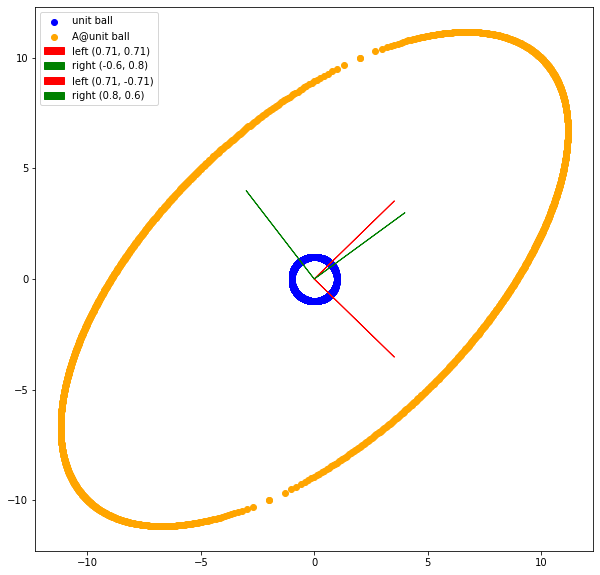

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(circle[0], circle[1], color = "blue", label = "unit ball")
A_circle = np.array(A@circle)
plt.scatter(A_circle[0], A_circle[1], color = "orange", label = "A@unit ball")
for i in range(0, 2):
    # векторы увеличены в 5 раз для лучшей видимости
    plt.arrow(0, 0, 5*u[0, i], 5*u[i, 1], label = f"left {round(u[0, i], 2), round(u[i, 1], 2)}", color = "red")
    plt.arrow(0, 0, 5*vt[0, i], 5*vt[i, 1], label = f"right {round(vt[0, i], 2), round(vt[i, 1], 2)}", color = "green")


plt.legend()
plt.show()

In [24]:
print(f'Frobenius norm of A: {np.sqrt(np.sum(np.square(np.diag(s))))}')
print(f'2-norm of A:         {np.max(np.diag(s))}')

print('Inverse A:')
print(vt.T@np.diag(s**(-1))@u.T)

print(f'Eigen values of A:   {np.linalg.eig(A)[0]}')

Frobenius norm of A: 15.811388300841895
2-norm of A:         14.142135623730947
Inverse A:
[[ 0.05 -0.11]
 [ 0.1  -0.02]]
Eigen values of A:   [1.5+9.88685997j 1.5-9.88685997j]


In [13]:
import datetime

In [14]:
today = datetime.date.today()
rate_change = datetime.date(day = 1, month = 9, year = 2023)

In [15]:
first = 1_734_580*1.06**((rate_change - datetime.date(day = 29, month = 6, year = 2023)).days/365)
first


1752393.071436989

In [16]:
second = 1_759_978*1.06**((rate_change - datetime.date(day = 3, month = 7, year = 2023)).days/365)
second

1776916.8569146672

In [17]:
third = 1_796_494*1.06**((rate_change - datetime.date(day = 5, month = 7, year = 2023)).days/365)
third

1813205.2884158902

In [18]:
# сколько отдам
res = (first + second + third + 3_086_928)*1.08**((today - datetime.date(day = 29, month = 8, year = 2023)).days/365)
res

8488300.838853551

In [19]:
# сколько процентов вышло
res - 1_734_580 - 1_759_978 - 1_796_494 - 3_086_928

110320.83885355107